In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import re
import os
os.chdir('/content/drive/MyDrive/응용통계학과 공모전')

from matplotlib import rc
import matplotlib.font_manager as fm
# 디렉토리 및 파일 이름에 맞추어 변경
font_location ='./NanumGothic.ttf'
# 폰트 설정
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 요약
### 1. 기술스택 분석

- 1-1 각 행의 기술스택 칼럼 값들을 리스트에 저장
- 1-2 각 행에 split 적용하여 nested list 로 변경
- 1-3 nested_list 셋 활용하여 단어의 동시출현 빈도를 계산
- 1-4 계산한 빈도를 노드간의 엣지로 활용하여 networkx 라이브러리를 활용한 네트워크 그래프 생성

### 2. 직무별 네트워크 분석

- 2-1 데이터 프레임의 직무를 기준으로 groupby한 뒤 각각의 직무 데이터프레임 생성
- 2-2 이후 위 과정과 동일

## 기술스택 분석


In [ ]:
import pandas as pd

df = pd.read_csv('./data/wanted_with_tokens.csv') # 'your_data.csv'를 실제 파일 경로로 변경해주세요.
lines = [df['기술스택'][i] for i in range(len(df)) if df['기술스택'][i]  != 'None']
lines

['Github, Android, Firebase, Kotlin, Coroutine',
 'C#, C, C++, WPF',
 'C#, C, C++, WPF',
 'Git, Firebase, Google Cloud Platform, Pytorch, React, Python, TypeScript, AWS, Docker',
 'Spark, Python, AWS, Spring Framework, Kubernetes',
 'Git, Github, Azure, Linux, C / C++, Python, Windows Azure, Flutter, FastAPI',
 'Linux, C#, Docker, OpenCV',
 'Python, R, Data Analysis, EDA, ML',
 'Pytorch, Tensorflow, ML',
 'C / C++, C#, JavaScript, Python, C++, GPU, CUDA',
 'MySQL, Python, Excel',
 'Git, Python',
 'Git, Python',
 'Python',
 'GitLab, Flask, MongoDB, Redis, JavaScript, Python, AWS, Go, Docker, PostgreSQL, Unity3D, Kubernetes, InfluxDB, FastAPI, Vue.JS, ML',
 'React, JavaScript, Kotlin, Swift, TypeScript, Rx, React.js',
 'Git, Android, MongoDB, MySQL, Kotlin, AWS',
 'AJAX, MySQL, React, Web Socket, JavaScript, Node.js, PHP, Python, TypeScript, Laravel, OpenCV, Next.js',
 'Pytorch, Tensorflow, Python',
 'Git, Android, MongoDB, MySQL, Kotlin, AWS',
 'Linux, Python, Docker, Kubernetes, FastAP

In [ ]:
words_list = []
for i in range(0,len(lines)):
  words_list.append(list(set(lines[i].replace("'","").split(","))))
words_list

[[' Firebase', ' Kotlin', ' Coroutine', ' Android', 'Github'],
 [' C', ' C++', 'C#', ' WPF'],
 [' C', ' C++', 'C#', ' WPF'],
 [' Google Cloud Platform',
  ' Firebase',
  'Git',
  ' TypeScript',
  ' Docker',
  ' AWS',
  ' Pytorch',
  ' Python',
  ' React'],
 ['Spark', ' Kubernetes', ' AWS', ' Spring Framework', ' Python'],
 [' Azure',
  ' FastAPI',
  'Git',
  ' C / C++',
  ' Linux',
  ' Github',
  ' Flutter',
  ' Windows Azure',
  ' Python'],
 ['Linux', ' OpenCV', ' Docker', ' C#'],
 ['Python', ' R', ' Data Analysis', ' ML', ' EDA'],
 ['Pytorch', ' ML', ' Tensorflow'],
 [' GPU', 'C / C++', ' C++', ' C#', ' JavaScript', ' Python', ' CUDA'],
 ['MySQL', ' Python', ' Excel'],
 [' Python', 'Git'],
 [' Python', 'Git'],
 ['Python'],
 [' Unity3D',
  ' Go',
  ' Flask',
  ' FastAPI',
  ' Kubernetes',
  ' Docker',
  ' Vue.JS',
  ' ML',
  ' MongoDB',
  ' Redis',
  ' PostgreSQL',
  ' AWS',
  ' JavaScript',
  ' InfluxDB',
  ' Python',
  'GitLab'],
 ['React',
  ' Kotlin',
  ' React.js',
  ' Rx',
  ' S

In [ ]:
count = {}   #동시출현 빈도가 저장될 dict
for line in words_list:
    #하나의 문서에서 동일한 단어가 두번 나와도 두번의 동시출현으로 고려X
    # words = list(set(line.split()))
    #한줄씩 읽어와서 단어별로 분리(unique한 값으로 받아오기)
    #split은 띄어쓰기를 단어로 구분하라는 함수

    for i, a in enumerate(line):
        for b in line[i+1:]:
            if a>b:
                count[b, a] = count.get((b, a),0) + 1
            else :
                count[a, b] = count.get((a, b),0) + 1

In [ ]:
#dictionary형 자료형을 판다스 데이터프레임으로 만들어줌
#orient=index를 넣어야 행으로 쭉 나열이 됨
df=pd.DataFrame.from_dict(count, orient='index')
df.head()

,0
"( Firebase, Kotlin)",4
"( Coroutine, Firebase)",4
"( Android, Firebase)",4
"( Firebase, Github)",4
"( Coroutine, Kotlin)",7


In [ ]:
list1=[]
for i in range(len(df)):
    #index를 중심으로 계속 중첩해서 list에 넣는다
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

#pandas 이용해서 df형태로 만들기
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])
df2

,term1,term2,freq
0,Firebase,Kotlin,4
1,Coroutine,Firebase,4
2,Android,Firebase,4
3,Firebase,Github,4
4,Coroutine,Kotlin,7
...,...,...,...
5373,C / C++,복제,1
5374,Hadoop,복제,1
5375,SQL,복제,1
5376,Linux,복제,1


In [ ]:
#pandas 이용해서 sorting 하기 (디폴트가 오름차순이라서 false 꼭 써줘야 내림차순으로 나옴)
df3=df2.sort_values(by=['freq'],ascending=False)
df3.head(100)

,term1,term2,freq
47,AWS,Python,165
35,Python,Git,90
563,Python,SQL,89
347,Python,Tensorflow,87
44,Docker,Python,86
...,...,...,...
377,Java,iOS,25
286,MySQL,TypeScript,25
577,MySQL,PostgreSQL,25
78,Github,Git,24


In [ ]:
df3

,term1,term2,freq
47,AWS,Python,165
35,Python,Git,90
563,Python,SQL,89
347,Python,Tensorflow,87
44,Docker,Python,86
...,...,...,...
3585,ML,Oracle,1
3584,ML,Node.js,1
3583,ML,REST,1
3582,ML,프론트엔드 개발자,1


In [ ]:
#np.where는 조건문 만드는 것: (슬라이싱) 빈도가 5개 엣지 출력
len((np.where(df3['freq']>=5))[0])

1686

In [ ]:
import numpy as np
import networkx as nx
import operator

G=nx.Graph()
for i in range(1686):
    #print(pair)
    G.add_edge(df3['term1'][i], df3['term2'][i], weight=int(df3['freq'][i]))

# Compute centralities for nodes.
# The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.
dgr = nx.degree_centrality(G)
btw = nx.betweenness_centrality(G)
cls = nx.closeness_centrality(G)

# itemgetter(0): key 또는 itemgetter(1): value로 sort key, reverse=True (descending order)
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)

print("** degree **")
for x in range(20):
    print(sorted_dgr[x])
print("** betweenness **")
for x in range(20):
    print(sorted_btw[x])
print("** closeness **")
for x in range(20):
    print(sorted_cls[x])

** degree **
(' Python', 0.7730061349693251)
(' AWS', 0.5950920245398773)
(' JavaScript', 0.5153374233128835)
(' React', 0.49079754601226994)
(' Docker', 0.43558282208588955)
('Git', 0.4171779141104295)
(' Pytorch', 0.4049079754601227)
(' TypeScript', 0.3558282208588957)
(' Tensorflow', 0.3374233128834356)
(' MySQL', 0.3374233128834356)
(' Node.js', 0.3374233128834356)
(' C++', 0.32515337423312884)
(' Java', 0.32515337423312884)
(' Kubernetes', 0.31901840490797545)
('Github', 0.3006134969325153)
(' ML', 0.3006134969325153)
(' MongoDB', 0.3006134969325153)
(' C#', 0.294478527607362)
(' HTML', 0.26993865030674846)
(' SQL', 0.26993865030674846)
** betweenness **
(' Python', 0.2568037053159922)
(' AWS', 0.08207783609423452)
(' JavaScript', 0.061817922559334)
(' Swift', 0.06118649357292011)
(' React', 0.046724684788633265)
('Git', 0.039085874304270345)
(' 인공 지능', 0.03753336058261369)
(' C++', 0.030236870839247698)
(' Pytorch', 0.0273206004335235)
(' Docker', 0.0248011705106243)
(' TypeScrip

In [ ]:
# 특정 노드 검색 및 주변 노드 출력
searched_node = "Python"  # 검색하고자 하는 특정 노드 이름
if searched_node in G.nodes:
    neighbors = list(G.neighbors(searched_node))
    print(f"Neighbors of {searched_node}: {neighbors}")
else:
    print(f"{searched_node} not found in the graph.")

Neighbors of Python: [' EDA', ' Data Analysis', ' ML', ' R', ' C++', ' NLP']


In [ ]:
# "파이썬" 노드와 연결된 노드 추출
python_node = "Python"
connected_nodes = list(G.neighbors(python_node))

# 연결된 노드 중에서 가중치가 높은 상위 4개 노드 출력
if connected_nodes:
    weights = [(node, G[python_node][node]['weight']) for node in connected_nodes]
    sorted_weights = sorted(weights, key=operator.itemgetter(1), reverse=True)

    print(f"Top 4 nodes connected to '{python_node}':")
    for i in range(min(4, len(sorted_weights))):
        print(f"{sorted_weights[i][0]} (Weight: {sorted_weights[i][1]})")
else:
    print(f"No nodes connected to '{python_node}'.")

Top 4 nodes connected to 'Python':
 C++ (Weight: 11)
 R (Weight: 8)
 Data Analysis (Weight: 4)
 EDA (Weight: 3)


In [ ]:
#단어끼리 서로 빈도를 세는 데이터셋을 만들었을 때 Gaphi로 시각화하는 것 전단계: graphml 확장자 형식으로 만들기
class MakeGraphml:
    def make_graphml(self, pair_file, graphml_file):
        out = open(graphml_file, 'w', encoding = 'utf-8')
        entity = []
        e_dict = {}
        count = []
        for i in range(len(pair_file)):
            e1 = pair_file.iloc[i,0]
            e2 = pair_file.iloc[i,1]
            #frq = ((word_dict[e1], word_dict[e2]),  pair.split('\t')[2])
            frq = ((e1, e2), pair_file.iloc[i,2])
            if frq not in count: count.append(frq)   # ((a, b), frq)
            if e1 not in entity: entity.append(e1)
            if e2 not in entity: entity.append(e2)
        print('# terms: %s'% len(entity))
        #create e_dict {entity: id} from entity
        for i, w in enumerate(entity):
            e_dict[w] = i + 1 # {word: id}
        out.write(
            "<?xml version=\"1.0\" encoding=\"UTF-8\"?><graphml xmlns=\"http://graphml.graphdrawing.org/xmlns\" xmlns:xsi=\"http://www.w3.org/2001/XMLSchema-instance\" xsi:schemaLocation=\"http://graphml.graphdrawing.org/xmlnshttp://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd\">" +
            "<key id=\"d1\" for=\"edge\" attr.name=\"weight\" attr.type=\"double\"/>" +
            "<key id=\"d0\" for=\"node\" attr.name=\"label\" attr.type=\"string\"/>" +
            "<graph id=\"Entity\" edgedefault=\"undirected\">" + "\n")
        # nodes
        for i in entity:
            out.write("<node id=\"" + str(e_dict[i]) +"\">" + "\n")
            out.write("<data key=\"d0\">" + i + "</data>" + "\n")
            out.write("</node>")
        # edges
        for y in range(len(count)):
            out.write("<edge source=\"" + str(e_dict[count[y][0][0]]) + "\" target=\"" + str(e_dict[count[y][0][1]]) + "\">" + "\n")
            out.write("<data key=\"d1\">" + str(count[y][1]) + "</data>" + "\n")
            #out.write("<edge source=\"" + str(count[y][0][0]) + "\" target=\"" + str(count[y][0][1]) +"\">"+"\n")
            #out.write("<data key=\"d1\">" + str(count[y][1]) +"</data>"+"\n")
            out.write("</edge>")
        out.write("</graph> </graphml>")
        print('now you can see %s' % graphml_file)
        #pairs.close()
        out.close()

gm = MakeGraphml()
graphml_file = '기술스택_네트워크분석_100.graphml'

#iloc는 인덱스 index of location 열에서 : 써야 함 (열 전체 보여주려면)
gm.make_graphml(df3.iloc[0:100,:], graphml_file)

In [ ]:
graphml_file = '기술스택_네트워크분석_1686.graphml'

#iloc는 인덱스 index of location 열에서 : 써야 함 (열 전체 보여주려면)
gm.make_graphml(df3.iloc[0:1686,:], graphml_file)

# terms: 166
now you can see 기술스택_네트워크분석_1686.graphml


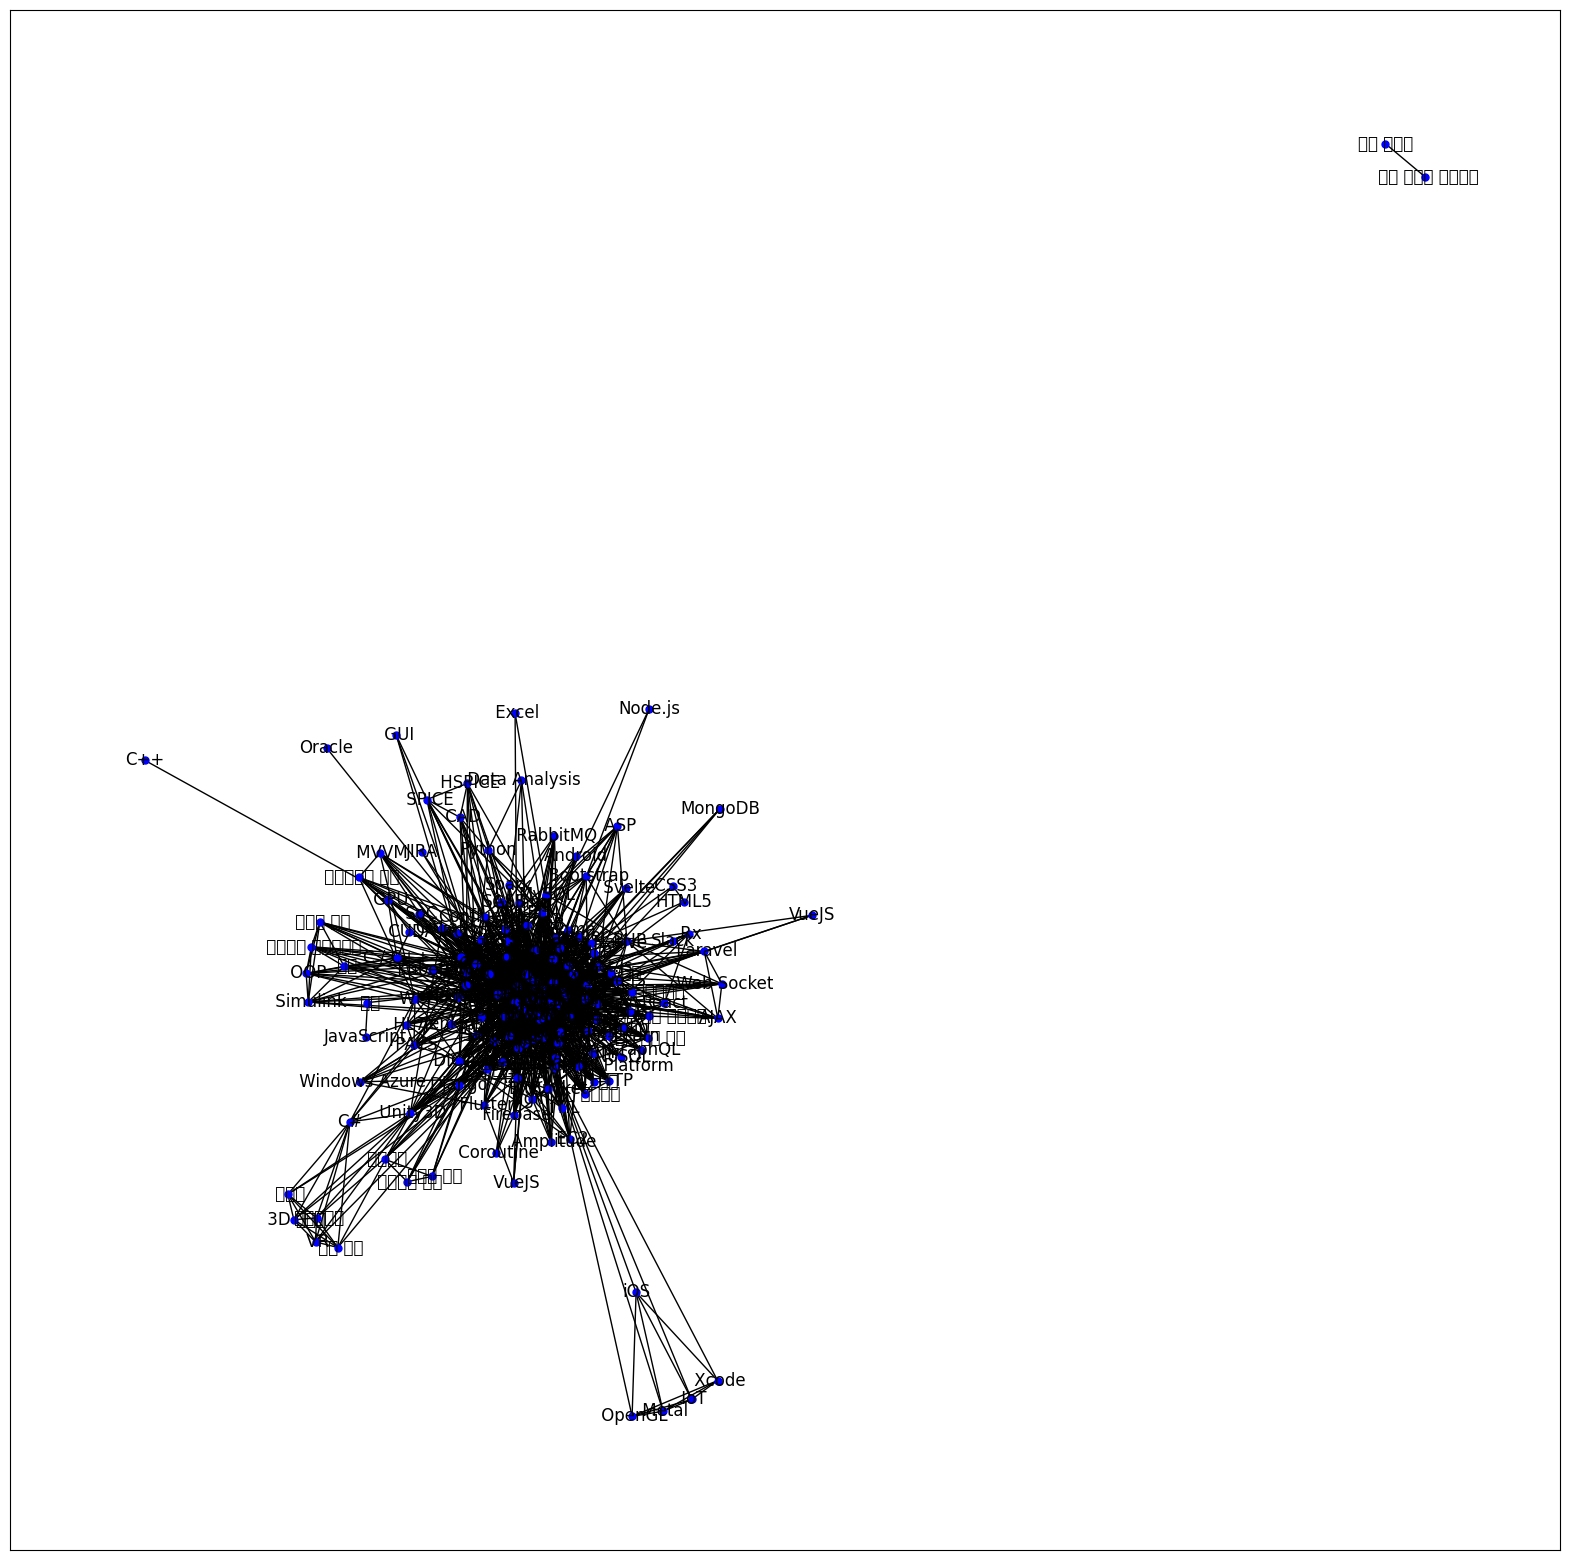

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# 시각화할 노드 수 설정
# num_nodes_to_display = 20
# nodes_to_display = list(G)[:num_nodes_to_display]

# # 시각화
# plt.figure(figsize=(10, 10))
# pos = nx.spring_layout(G, k=0.15)
# nx.draw_networkx(G, pos, node_size=45, node_color='blue', nodelist=nodes_to_display)
# plt.show()

#시각화
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k = 0.15)
nx.draw_networkx(G,pos, node_size = 25, node_color = 'blue')
plt.show()

## 직무별 네트워크 분석

In [ ]:
df = pd.read_csv('./data/wanted_with_tokens.csv') # 'your_data.csv'를 실제 파일 경로로 변경해주세요.
df['직무'].unique()

array(['머신러닝 엔지니어', '데이터 엔지니어', '데이터 사이언티스트', '빅데이터 엔지니어', 'BI 엔지니어',
       'DBA'], dtype=object)

In [ ]:
#소문자로 다 변경
df = df[df['기술스택'] != 'None'].reset_index(drop=True)
df['기술스택'] = df['기술스택'].str.lower()

# 해당 한국어들은 영어로 번역하고 그 외 한국어들은 제외
included_words_translation = {
    '백엔드': 'backend',
    '데이터베이스': 'database',
    '서버': 'server',
    '통계': 'statistics',
    '컴파일러': 'compiler',
    '리팩토링': 'refactoring',
    '운영체제': 'operating system',
    '모델링': 'modeling',
    '임베디드': 'embedded',
    '자바': 'java',
    '리눅스': 'linux',
    '프론트엔드': 'frontend'
}

for korean, english in included_words_translation.items():
  df['기술스택'] = df['기술스택'].str.replace(korean, english, case=False)

In [ ]:
# 한글 단어만 추출하여 리스트에 저장
korean_words_list = []
for text in df['기술스택']:
    # 쉼표로 구분된 각 단어를 분리
    words = text.split(', ')

    # 각 단어에서 한글만 추출하여 리스트에 저장
    for word in words:
        if re.search('[ㄱ-ㅎㅏ-ㅣ가-힣]+', word):  # 해당 단어에 한글이 포함되어 있는지 확인
            korean_words_list.append(word.strip())

korean_words_list = list(set(korean_words_list))
del_pattern = r'\s,\s'  # 공백과 쉼표를 함께 처리하는 정규 표현식 패턴

# 한글 및 콤마 삭제 및 중복된 공백 제거
for del_word in korean_words_list:
    df['기술스택'] = df['기술스택'].apply(lambda x: re.sub(del_word, '', str(x).strip()))

# '기술스택' 열에 적용
df['기술스택'] = df['기술스택'].apply(lambda x: re.sub(del_pattern, '', str(x)))

# 쉼표만 포함된 행 제거
df = df[df['기술스택'] != ',']
df['기술스택']

0           github, android, firebase, kotlin, coroutine
1                                        c#, c, c++, wpf
2                                        c#, c, c++, wpf
3      git, firebase, google cloud platform, pytorch,...
4       spark, python, aws, spring framework, kubernetes
                             ...                        
776                              react, spring framework
777    confluence, gitlab, jira, android, ios, java, ...
778                              react, html, javascript
779    git, hadoop, linux, mysql, oracle, c / c++, py...
780    hadoop, spark, sql, data analysis, tableau, am...
Name: 기술스택, Length: 775, dtype: object

In [ ]:
# 직무별로 데이터프레임을 쪼개기
MLE_df = df[df['직무'] == '머신러닝 엔지니어']
DE_df = df[df['직무'] == '데이터 엔지니어']
DS_df = df[df['직무'] == '데이터 사이언티스트']
BD_df = df[df['직무'] == '빅데이터 엔지니어']
BI_df = df[df['직무'] == 'BI 엔지니어']
DBA_df = df[df['직무'] == 'DBA']

In [ ]:
MLE_skill = MLE_df['기술스택']
DE_skill = DE_df['기술스택']
DS_skill = DS_df['기술스택']
BD_skill = BD_df['기술스택']
BI_skill = BI_df['기술스택']
DBA_skill = DBA_df['기술스택']

In [ ]:
# Remove single quotes and square brackets
MLE_list = []
DE_list = []
DS_list = []
BD_list = []
BI_list = []
DBA_list = []
words_list = [MLE_list, DE_list, DS_list, BD_list, BI_list, DBA_list]
job_skill = [MLE_skill, DE_skill, DS_skill, BD_skill, BI_skill, DBA_skill]

# Iterate over each job skill
for skill, word_list in zip(job_skill, words_list):
    for i in range(len(skill)):
        # Remove single quotes and square brackets, split into a list of words
        words = skill.iloc[i].replace("'", "").replace("[", "").replace("]", "").split(", ")

        # Append the list of words to the corresponding word_list
        word_list.append(words)
# for skill in job_skill:
#   for i in range(0,len(skill)):
#     words_list[i].append(list(set(skill[i].replace("'","").split(","))))
# words_list

In [ ]:
from collections import Counter

# Initialize count dictionaries
MLE_count = Counter()
DE_count = Counter()
DS_count = Counter()
BD_count = Counter()
BI_count = Counter()
DBA_count = Counter()

count_list = [MLE_count, DE_count, DS_count, BD_count, BI_count, DBA_count]

# Iterate over each job role's word list
for word_list, count_dict in zip(words_list, count_list):
    # Iterate over each line in the word list
    for line in word_list:
        # Count co-occurrence of words in the line
        count_dict.update(Counter((a, b) if a < b else (b, a) for i, a in enumerate(line) for b in line[i+1:]))

# Convert count dictionaries to pandas DataFrame
df_MLE = pd.DataFrame.from_dict(MLE_count, orient='index', columns=['count'])
df_DE = pd.DataFrame.from_dict(DE_count, orient='index', columns=['count'])
df_DS = pd.DataFrame.from_dict(DS_count, orient='index', columns=['count'])
df_BD = pd.DataFrame.from_dict(BD_count, orient='index', columns=['count'])
df_BI = pd.DataFrame.from_dict(BI_count, orient='index', columns=['count'])
df_DBA = pd.DataFrame.from_dict(DBA_count, orient='index', columns=['count'])

In [ ]:
# Initialize an empty list to store the co-occurrence dataframes
# 직무별 단어 동시출현 빈도를 저장해둘 리스트
co_occurrence_dfs = []

# Iterate over each job role's count dataframe
for df_count in [df_MLE, df_DE, df_DS, df_BD, df_BI, df_DBA]:
    list1 = []

    # Iterate over the rows of the count dataframe
    for i in range(len(df_count)):
        list1.append([df_count.index[i][0], df_count.index[i][1], df_count['count'][i]])

    # Create a new dataframe from the list
    df2 = pd.DataFrame(list1, columns=["term1", "term2", "freq"])

    # Sort the dataframe by frequency in descending order
    df3 = df2.sort_values(by=['freq'], ascending=False)

    # Append the sorted dataframe to the list
    co_occurrence_dfs.append(df3)

# Access the co-occurrence dataframe for a specific job role like this: co_occurrence_dfs[0] for '머신러닝 엔지니어'

In [ ]:
#머신러닝 엔지니어의 단어 동시출현 빈도 df
co_occurrence_dfs[0]

,term1,term2,freq
38,python,pytorch,61
112,pytorch,tensorflow,52
47,aws,python,48
340,python,tensorflow,40
20,git,python,38
...,...,...,...
1032,devops,nodejs,1
1031,devops,elasticsearch,1
1030,",",jquery,1
1029,jquery,nodejs,1


In [ ]:
# 빈도수가 2 이상인 엣지만 필터링
for i in range(6):
  print(len((np.where(co_occurrence_dfs[i]['freq']>=2))[0]))

1027
1111
661
617
12
187


In [ ]:
import numpy as np
import networkx as nx
import operator

# Create a list to store graphs
graphs = []

# Iterate over each co-occurrence DataFrame
for df_count in co_occurrence_dfs:
    # Create a new graph for each DataFrame
    G = nx.Graph()

    # Add edges to the graph
    for i in range(max(100, len(np.where(df_count['freq'] >= 2)[0]))):
        G.add_edge(df_count['term1'][i], df_count['term2'][i], weight=int(df_count['freq'][i]))

    # Compute centralities for nodes
    dgr = nx.degree_centrality(G)
    btw = nx.betweenness_centrality(G)
    cls = nx.closeness_centrality(G)

    # Sort centralities
    sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
    sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
    sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)

    # Print the top 20 centralities
    print(f"\n** - degree **")
    for x in range(5):
        print(sorted_dgr[x])

    print(f"** - betweenness **")
    for x in range(5):
        print(sorted_btw[x])

    print(f"** - closeness **")
    for x in range(5):
        print(sorted_cls[x])

    # Append the graph to the list
    graphs.append(G)


** - degree **
('python', 0.719626168224299)
('javascript', 0.6635514018691588)
('aws', 0.6261682242990654)
('react', 0.5514018691588785)
('git', 0.5420560747663551)
** - betweenness **
('python', 0.16922470040022008)
('javascript', 0.11491888381865524)
('aws', 0.08956744162070247)
('react', 0.058895847081716496)
('ios', 0.05809988764686582)
** - closeness **
('python', 0.7697841726618705)
('javascript', 0.7482517482517482)
('aws', 0.7278911564625851)
('react', 0.6815286624203821)
('git', 0.6729559748427673)

** - degree **
('python', 0.7192982456140351)
('aws', 0.6578947368421052)
('javascript', 0.6052631578947368)
('sql', 0.5789473684210527)
('docker', 0.49122807017543857)
** - betweenness **
('python', 0.15037363520026295)
('aws', 0.08920827039536328)
('javascript', 0.07794752294919678)
('sql', 0.07369427055681768)
('java', 0.07130591904804887)
** - closeness **
('python', 0.7663183694530444)
('aws', 0.7288062814378603)
('javascript', 0.6994583774873425)
('sql', 0.6856532779316712)

In [ ]:
edge_weights = nx.get_edge_attributes(graphs[0], 'weight')

  # 가중치가 높은 순으로 노드 정렬
sorted_nodes = sorted(edge_weights, key=edge_weights.get, reverse=True)
sorted_nodes

In [ ]:
#단어끼리 서로 빈도를 세는 데이터셋을 만들었을 때 Gaphi로 시각화하는 것 전단계: graphml 확장자 형식으로 만들기
class MakeGraphml:
    def make_graphml(self, pair_file, graphml_file):
        out = open(graphml_file, 'w', encoding = 'utf-8')
        entity = []
        e_dict = {}
        count = []
        for i in range(len(pair_file)):
            e1 = pair_file.iloc[i,0]
            e2 = pair_file.iloc[i,1]
            #frq = ((word_dict[e1], word_dict[e2]),  pair.split('\t')[2])
            frq = ((e1, e2), pair_file.iloc[i,2])
            if frq not in count: count.append(frq)   # ((a, b), frq)
            if e1 not in entity: entity.append(e1)
            if e2 not in entity: entity.append(e2)
        print('# terms: %s'% len(entity))
        #create e_dict {entity: id} from entity
        for i, w in enumerate(entity):
            e_dict[w] = i + 1 # {word: id}
        out.write(
            "<?xml version=\"1.0\" encoding=\"UTF-8\"?><graphml xmlns=\"http://graphml.graphdrawing.org/xmlns\" xmlns:xsi=\"http://www.w3.org/2001/XMLSchema-instance\" xsi:schemaLocation=\"http://graphml.graphdrawing.org/xmlnshttp://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd\">" +
            "<key id=\"d1\" for=\"edge\" attr.name=\"weight\" attr.type=\"double\"/>" +
            "<key id=\"d0\" for=\"node\" attr.name=\"label\" attr.type=\"string\"/>" +
            "<graph id=\"Entity\" edgedefault=\"undirected\">" + "\n")
        # nodes
        for i in entity:
            out.write("<node id=\"" + str(e_dict[i]) +"\">" + "\n")
            out.write("<data key=\"d0\">" + i + "</data>" + "\n")
            out.write("</node>")
        # edges
        for y in range(len(count)):
            out.write("<edge source=\"" + str(e_dict[count[y][0][0]]) + "\" target=\"" + str(e_dict[count[y][0][1]]) + "\">" + "\n")
            out.write("<data key=\"d1\">" + str(count[y][1]) + "</data>" + "\n")
            #out.write("<edge source=\"" + str(count[y][0][0]) + "\" target=\"" + str(count[y][0][1]) +"\">"+"\n")
            #out.write("<data key=\"d1\">" + str(count[y][1]) +"</data>"+"\n")
            out.write("</edge>")
        out.write("</graph> </graphml>")
        print('now you can see %s' % graphml_file)
        #pairs.close()
        out.close()

gm = MakeGraphml()

- ML엔지니어에서 sql을 찾지 못하는 문제 발견
- 빈도수 슬라이싱 범위를 2까지 낮춰서 최대한 많은 노드가 그래프 내에 포함되도록 함.
- 텍스트 네트워크 시각화 결과는 기존의 것 대로 하되, 기술스택 인풋을 받아 연결된 역량을 제시해줄 적에는 더 많은 노드가 포함된 네트워크로 결과 제시

In [ ]:
#1027 1111 661 617 100 187
#iloc는 인덱스 index of location 열에서 : 써야 함 (열 전체 보여주려면)
gm.make_graphml(co_occurrence_dfs[0].iloc[0:1027,:], "ML_graph_gpt.graphml")
gm.make_graphml(co_occurrence_dfs[1].iloc[0:1111,:], "DE_graph_gpt.graphml")
gm.make_graphml(co_occurrence_dfs[2].iloc[0:661,:], "DSC_graph_gpt.graphml")
gm.make_graphml(co_occurrence_dfs[3].iloc[0:617,:], "BD_graph_gpt.graphml")
gm.make_graphml(co_occurrence_dfs[4].iloc[0:100,:], "BI_graph_gpt.graphml")
gm.make_graphml(co_occurrence_dfs[5].iloc[0:187,:], "DBA_graph_gpt.graphml")

# 그래프를 GML 파일로 저장
nx.write_gml(graphs[0], "ML_graph_gpt.gml")
nx.write_gml(graphs[1], "DE_graph_gpt.gml")
nx.write_gml(graphs[2], "DSC_graph_gpt.gml")
nx.write_gml(graphs[3], "BD_graph_gpt.gml")
nx.write_gml(graphs[4], "BI_graph_gpt.gml")
nx.write_gml(graphs[5], "DBA_graph_gpt.gml")

# terms: 120
now you can see ML_graph_gpt.graphml
# terms: 125
now you can see DE_graph_gpt.graphml
# terms: 90
now you can see DSC_graph_gpt.graphml
# terms: 84
now you can see BD_graph_gpt.graphml
# terms: 32
now you can see BI_graph_gpt.graphml
# terms: 49
now you can see DBA_graph_gpt.graphml


In [ ]:
#276 272 145 102
#iloc는 인덱스 index of location 열에서 : 써야 함 (열 전체 보여주려면)
gm.make_graphml(co_occurrence_dfs[0].iloc[0:276,:], "머신러닝엔지니어_기술스택_276_final.graphml")
gm.make_graphml(co_occurrence_dfs[1].iloc[0:272,:], "데이터엔지니어_기술스택_272_final.graphml")
gm.make_graphml(co_occurrence_dfs[2].iloc[0:145,:], "데이터사이언티스트_기술스택_145_final.graphml")
gm.make_graphml(co_occurrence_dfs[3].iloc[0:102,:], "빅데이터_기술스택_102_final.graphml")
gm.make_graphml(co_occurrence_dfs[4].iloc[0:100,:], "BI_기술스택_100_final.graphml")
gm.make_graphml(co_occurrence_dfs[5].iloc[0:100,:], "DBA_기술스택_100_final.graphml")

### input과 비교해 근접 노드 출력하기

In [ ]:
# 그래프를 GML 파일로 저장
nx.write_gml(graphs[0], "머신러닝엔지니어_기술스택분석_276_final.gml")
nx.write_gml(graphs[1], "데이터엔지니어_기술스택_272_final.gml")
nx.write_gml(graphs[2], "데이터사이언티스트_기술스택_145_final.gml")
nx.write_gml(graphs[3], "빅데이터_기술스택_102_final.gml")
nx.write_gml(graphs[4], "BI_기술스택_100_final.gml")
nx.write_gml(graphs[5], "DBA_기술스택_100_final.gml")

#load_graph = nx.read_gml("example_graph.gml")

In [ ]:
import numpy as np
import networkx as nx
import operator
# 그래프를 GML 파일로 저장
ML_graph = nx.read_gml("ML_graph_gpt.gml")
DE_graph = nx.read_gml("DE_graph_gpt.gml")
DSC_graph = nx.read_gml("DSC_graph_gpt.gml")
BD_graph = nx.read_gml("BD_graph_gpt.gml")
BI_graph = nx.read_gml("BI_graph_gpt.gml")
DBA_graph = nx.read_gml("DBA_graph_gpt.gml")

In [ ]:
ML_graph.nodes()

NodeView(('android', 'github', 'firebase', 'kotlin', 'coroutine', 'c', 'c#', 'c++', 'wpf', 'git', 'google cloud platform', 'pytorch', 'react', 'python', 'typescript', 'aws', 'docker', 'spark', 'spring framework', 'kubernetes', 'azure', 'linux', 'c / c++', 'windows azure', 'flutter', 'fastapi', 'opencv', 'r', 'data analysis', 'eda', 'ml', 'tensorflow', 'javascript', 'gpu', 'cuda', 'mysql', 'excel', 'flask', 'gitlab', 'mongodb', 'redis', 'go', 'postgresql', 'unity3d', 'influxdb', 'vue.js', 'swift', 'rx', 'react.js', 'ajax', 'web socket', 'node.js', 'php', 'laravel', 'next.js', 'python,', 'ios', 'java', 'swift,aws,', 'jpa', 'spring boot', 'confluence', 'jira', 'html', 'sql', 'css', 'nodejs', 'nest.js', 'django', 'nlp', 'gcp', 'metal', 'opengl', 'iot', 'xcode', 'slack', 'python,nlp', 'modeling,', 'gcp,,ml', 'css3', 'html5', 'react native', 'nosql', 'graphql', 'pacs', 'hl7', 'dicom', 'ros', 'vr,', '3d modeling,게임unity3d', 'jenkins', 'refactoring', '알고리즘backendfastapi', 'scikit-learn', 'nump

In [ ]:
def count_node_appearances(graph):
    node_counts = {node: 0 for node in graph.nodes()}

    for node in graph.nodes():
        for _, neighbor in graph.edges(node):
            node_counts[neighbor] += 1

    return node_counts

node_appearances = count_node_appearances(ML_graph)
print(node_appearances)

{'android': 24, 'github': 51, 'firebase': 12, 'kotlin': 23, 'coroutine': 4, 'c': 24, 'c#': 26, 'c++': 29, 'wpf': 11, 'git': 58, 'google cloud platform': 13, 'pytorch': 49, 'react': 59, 'python': 77, 'typescript': 41, 'aws': 67, 'docker': 46, 'spark': 4, 'spring framework': 21, 'kubernetes': 38, 'azure': 33, 'linux': 32, 'c / c++': 24, 'windows azure': 8, 'flutter': 8, 'fastapi': 24, 'opencv': 24, 'r': 14, 'data analysis': 4, 'eda': 28, 'ml': 36, 'tensorflow': 38, 'javascript': 71, 'gpu': 6, 'cuda': 6, 'mysql': 44, 'excel': 2, 'flask': 28, 'gitlab': 15, 'mongodb': 42, 'redis': 27, 'go': 15, 'postgresql': 35, 'unity3d': 15, 'influxdb': 23, 'vue.js': 18, 'swift': 11, 'rx': 6, 'react.js': 23, 'ajax': 11, 'web socket': 11, 'node.js': 40, 'php': 13, 'laravel': 13, 'next.js': 34, 'python,': 1, 'ios': 24, 'java': 43, 'swift,aws,': 14, 'jpa': 18, 'spring boot': 17, 'confluence': 17, 'jira': 24, 'html': 33, 'sql': 33, 'css': 18, 'nodejs': 30, 'nest.js': 23, 'django': 19, 'nlp': 12, 'gcp': 11, 'm

In [ ]:
# "파이썬" 노드와 연결된 노드 추출
python_node = "python"
connected_nodes = list(load_graph.neighbors(python_node))

# 연결된 노드 중에서 가중치가 높은 상위 4개 노드 출력
if connected_nodes:
    weights = [(node, load_graph[python_node][node]['weight']) for node in connected_nodes]
    sorted_weights = sorted(weights, key=operator.itemgetter(1), reverse=True)

    print(f"Top 4 nodes connected to '{python_node}':")
    for i in range(min(4, len(sorted_weights))):
        print(f"{sorted_weights[i][0]} (Weight: {sorted_weights[i][1]})")
else:
    print(f"No nodes connected to '{python_node}'.")

Top 4 nodes connected to 'python':
pytorch (Weight: 61)
aws (Weight: 48)
git (Weight: 38)
docker (Weight: 34)
